In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../../")
import os.path
from src.compress_sensing_library import *
from src.utility_library import *

# Package for importing image representation
from PIL import Image, ImageOps

import pandas as pd
import seaborn as sns
import time

In [2]:
img = 'tree_part1.jpg'
img_nm = 'tree_part1'

num_cell_list = [50, 100, 200, 300, 500]
save = False


V1_data = '../../result/dct/{img}/V1/param_Mon_Apr_24_13_00_36_2023.csv'.format(img = img_nm)
pixel_data = '../../result/dct/{img}/pixel/param_Mon_Apr_24_12_27_11_2023.csv'.format(img = img_nm)
gaussian_data = '../../result/dct/{img}/gaussian/param_Mon_Apr_24_12_26_31_2023.csv'.format(img = img_nm)
# V1_data = 'param_Mon_Apr_24_13_00_36_2023.csv'
# pixel_data = 'param_Mon_Apr_24_12_27_11_2023.csv'
# gaussian_data = 'param_Mon_Apr_24_12_26_31_2023.csv'


In [3]:
V1_param_df[V1_param_df['num_cell'] == num_cell]

NameError: name 'V1_param_df' is not defined

In [12]:
process_result_data(img, 'dct', pixel_data, gaussian_data, V1_data)

{'V1': (       rep    alp  num_cell  cell_size  sparse_freq      error  min_error
  246      0   0.01       500          8            2  12.752453  12.643354
  336      0   0.10       300          4            2  16.704312  16.712779
  422      0   1.00       100          8            4  22.767379  22.654928
  446      0   1.00       200          8            2  19.686726  19.674731
  522      0  10.00        50          8            4  25.955865  25.773435
  ...    ...    ...       ...        ...          ...        ...        ...
  16871   19   0.01       500          8            2  12.750178  12.643354
  16961   19   0.10       300          4            2  16.565338  16.712779
  17047   19   1.00       100          8            4  22.677060  22.654928
  17071   19   1.00       200          8            2  19.365756  19.674731
  17147   19  10.00        50          8            4  25.224403  25.773435
  
  [100 rows x 7 columns],
       num_cell  sparse_freq  cell_size    alp  min_e

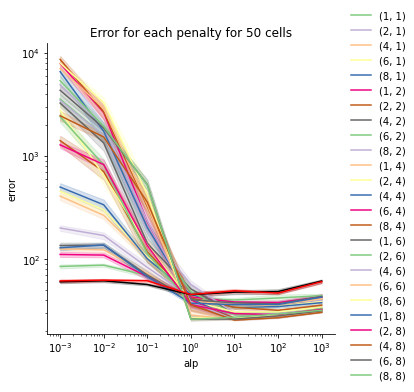

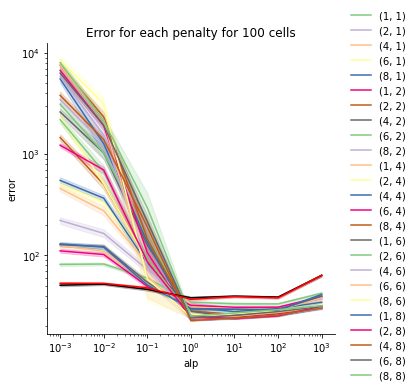

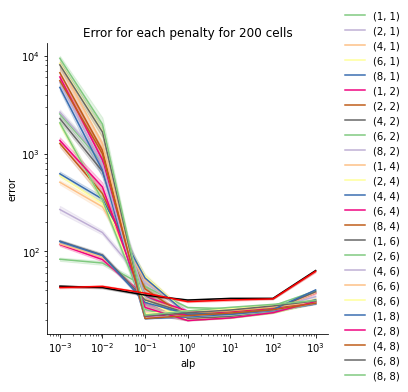

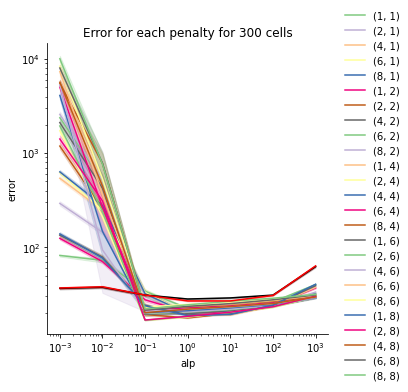

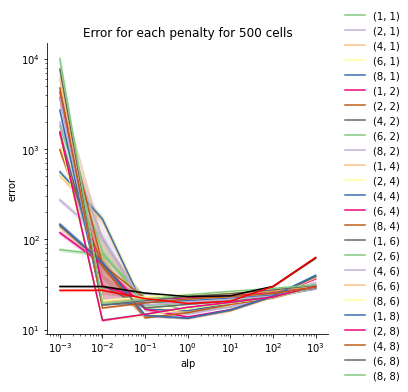

In [4]:
for num_cell in num_cell_list:
    # Work on previously saved data
    V1_param_df = remove_unnamed_data(pd.read_csv(V1_data))
    pixel_param_df = remove_unnamed_data(pd.read_csv(pixel_data))
    gaussian_param_df = remove_unnamed_data(pd.read_csv(gaussian_data))


    # bring only specific number of cell data
    V1_param_df = V1_param_df[V1_param_df['num_cell'] == num_cell]
    pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
    gaussian_param_df = gaussian_param_df[gaussian_param_df['num_cell'] == num_cell]
#     save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
    
#     fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
#                       hue = V1_param_df[['sparse_freq', 'cell_sz']].apply(tuple, axis = 1))
#     fig.set(yscale='log')
#     fig.set(xscale='log')
#     fig.set(title='error for each frequency for {cell} number of cell'.format(cell = num_cell))
#     if (save):
#         fig.savefig(os.path.join(save_path, "alpha_error_per_hyperparam_{cell}_num_cell_".
#                                  format(cell = num_cell) + "_".
#                                  join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()


#     save_path = os.path.join('./result/{img}/'.format(img = working_img.split('.')[0]))
    fig = sns.relplot(data = V1_param_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
                      hue = V1_param_df[['sparse_freq', 'cell_size']].apply(tuple, axis = 1), legend = True)

    fig.set(title='Error for each penalty for {cell} cells'.format(cell = num_cell))
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = pixel_param_df, 
            label= 'pixel_error', color = 'black', 
            legend = False)#.add_legend(title='Pixel & Gaussian', loc = 'right')
    fig.map(sns.lineplot, x = 'alp', y = 'error', data = gaussian_param_df, 
            label= 'gaussian_error', color = 'red', 
            legend = False)
    fig.set(yscale='log')
    fig.set(xscale='log')
#     plt.legend(title = 'V1')
    # plt.legend(title = 'pixel', label = ['classic'])

    if (save):
        fig.savefig(os.path.join(save_path, "Error_for_each_penalty_{cell}_num_cell_".
                                 format(cell = num_cell) + "_".
                                 join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
    plt.show()


#     save_path = os.path.join('./result/{img}/pixel/'.format(img = working_img.split('.')[0]))

#     pixel_fig = sns.relplot(data = pixel_param_df, x = 'alpha', y = 'error', kind= 'line')
#     pixel_fig.set(yscale='log')
#     pixel_fig.set(xscale='log')
#     plt.title('pixel: Error for each penalty {cell} cells'.format(cell = num_cell))

#     if (save):
#         pixel_fig.savefig(os.path.join(save_path, "Error_for_each_penalty_" + "_".join(
#             str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
#     plt.show()

In [14]:
num_cell = 50
pixel_param_df = remove_unnamed_data(pd.read_csv(pixel_data))

In [15]:

pixel_param_df = pixel_param_df[pixel_param_df['num_cell'] == num_cell]
pixel_param_df

,rep,alp,num_cell,error
0,0,0.001,50,65.186220
5,0,0.010,50,71.380480
10,0,0.100,50,52.868393
15,0,1.000,50,39.015665
20,0,10.000,50,49.399201
...,...,...,...,...
675,19,0.100,50,59.848959
680,19,1.000,50,65.155955
685,19,10.000,50,51.694572
690,19,100.000,50,44.924210


In [11]:
pixel_param_df

,rep,alp,num_cell,error
